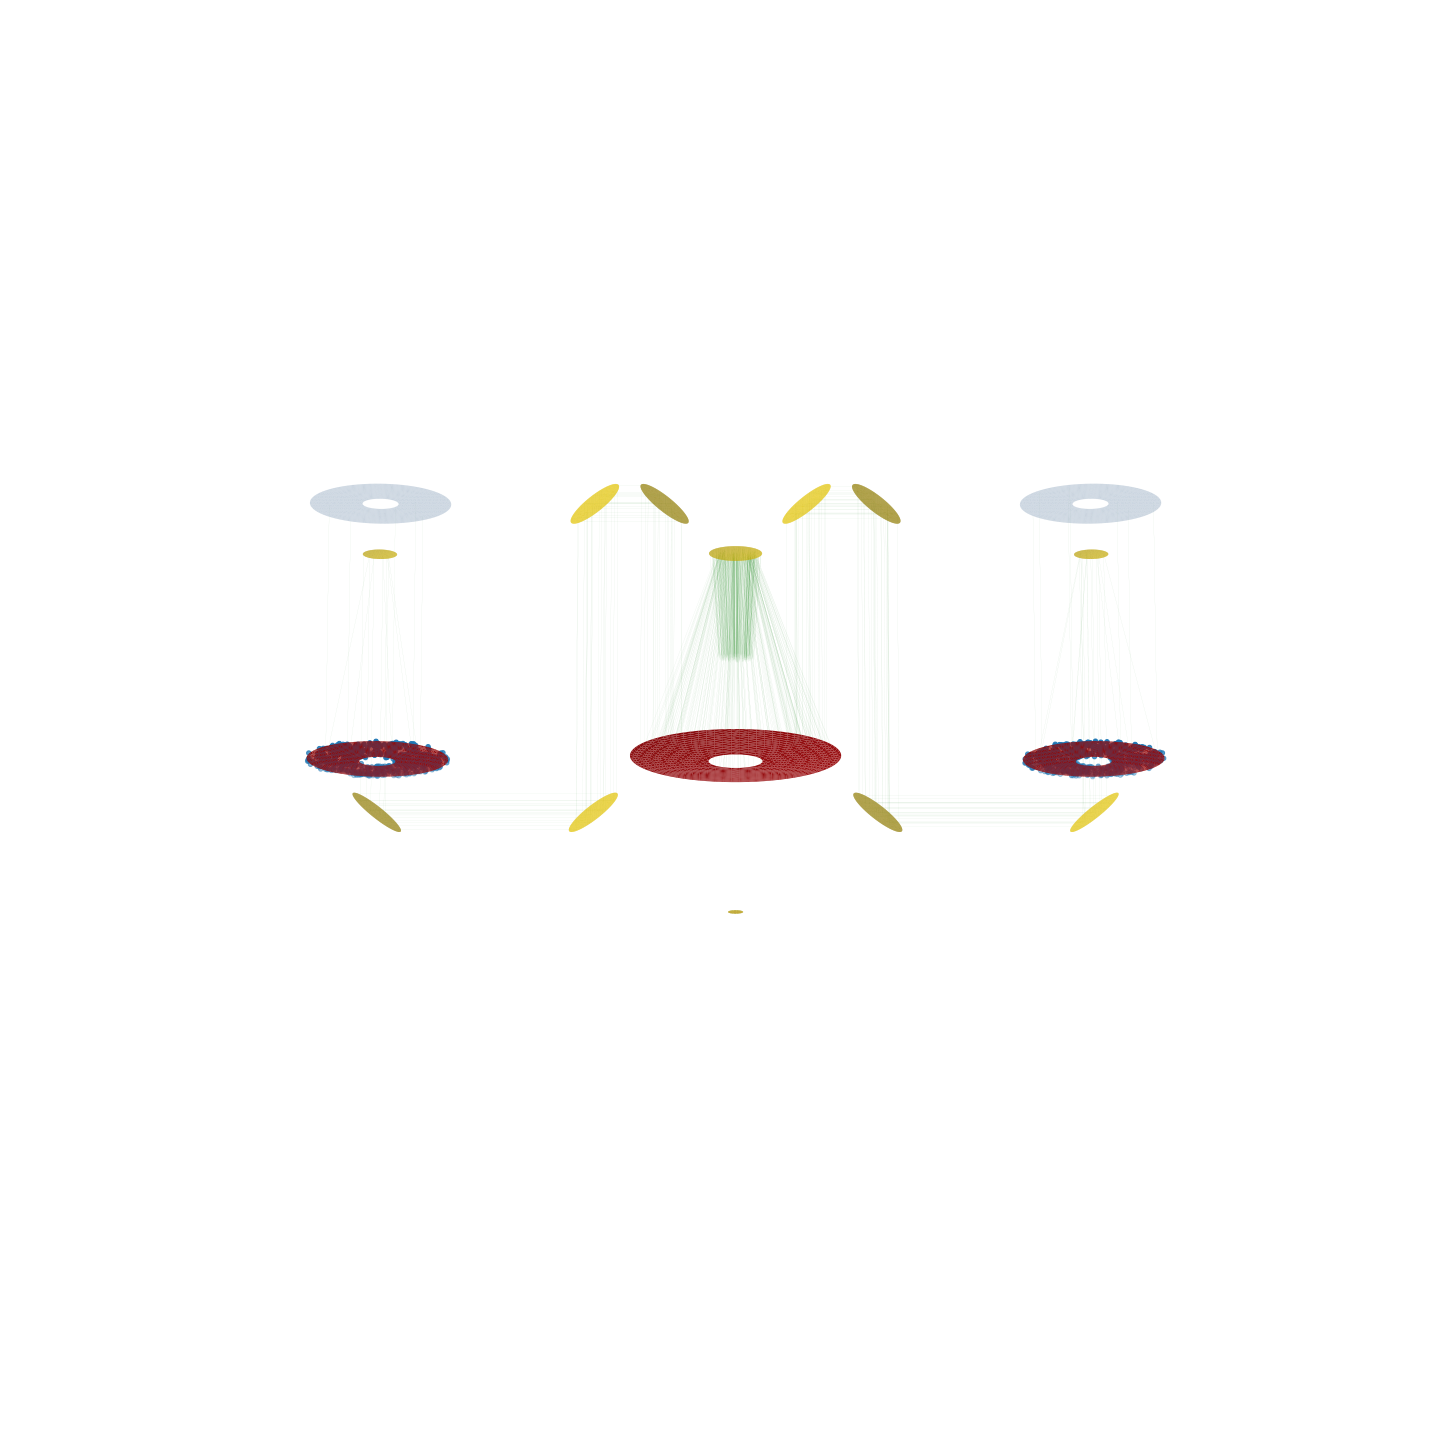

In [76]:
import pimms.optics as op
reload(op)
reload(op.lins)
sim=op.SIM(init_b=10., detector_a=.15)
opn=op.OpticalPathNetwork(sim)
s=op.LightSource((0., np.deg2rad(0.), 1e5))
s2=op.LightSource((0., np.pi, np.abs(sim.get_detectors()[0].p[2])))
p,q=s2([op.SymmetricQuadricMirror(0,1,f=np.inf,g=np.inf,p=[0.,0.,-3])], 1000, 1, sampling='random')
pt,mt=sim.trace_network(q,opn,reverse=True,starts=[sim.combiner.parts[3]],stops=sim.get_entrance())
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.')
sim.draw(axes=ax, draw_virtual=True,raytrace=pt,view_angles=(-15,-90))
plt.show()

In [16]:
print(np.unique(mt[-1]))
m=np.bool_(mt[-1]==0)
np.max(pt[-1]['direction'][m,2])

[-1  0  4]


1.0000000000000002

Batch 1: 194 rays traced on aperture stop.
Batch 1: 194 rays perturbed.
Batch 1: 182 backwards rays traced on entrance.
Batch 1: 182 intersections solved, S-stats: -4.97E-14 (min), 6.04E-14 (max), 1.21E-15 (avg).
Batch 2: 195 rays traced on aperture stop.
Batch 2: 195 rays perturbed.
Batch 2: 186 backwards rays traced on entrance.
Batch 2: 186 intersections solved, S-stats: -4.26E-14 (min), 5.68E-14 (max), 3.63E-16 (avg).
Batch 3: 198 rays traced on aperture stop.
Batch 3: 198 rays perturbed.
Batch 3: 190 backwards rays traced on entrance.
Batch 3: 190 intersections solved, S-stats: -4.97E-14 (min), 3.91E-14 (max), -8.60E-16 (avg).
Batch 4: 196 rays traced on aperture stop.
Batch 4: 196 rays perturbed.
Batch 4: 189 backwards rays traced on entrance.
Batch 4: 189 intersections solved, S-stats: -4.97E-14 (min), 4.97E-14 (max), -4.51E-16 (avg).
Batch 5: 194 rays traced on aperture stop.
Batch 5: 194 rays perturbed.
Batch 5: 178 backwards rays traced on entrance.
Batch 5: 178 intersections

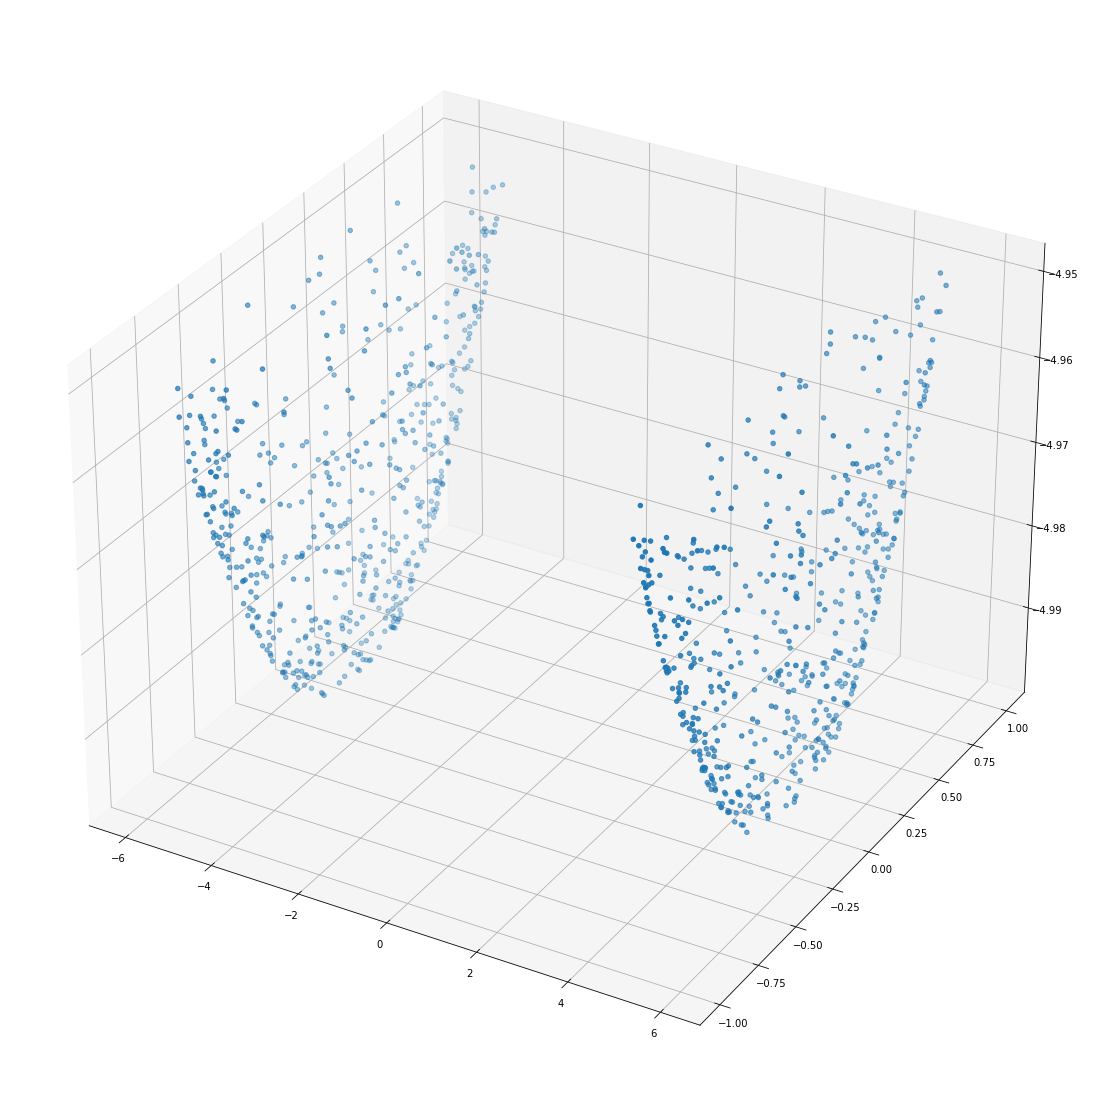

In [75]:
n=opn.entrance_pupil(min_samplings=1000,batch_rays=100,verbose=True)
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2])

In [64]:
import pimms.optics as op
reload(op)
sim=op.SIM()
src=op.LightSource((0.,0.,np.inf))
opn=op.OpticalPathNetwork(sim)
p,q=src(sim.get_entrance(),100,1,sampling='crosshair')
%time pt0,mt0=sim.trace(q)
%time pt1,mt1=sim.trace_network(q,opn)
print(np.all(pt0==pt1))

CPU times: user 708 ms, sys: 239 ms, total: 947 ms
Wall time: 704 ms
CPU times: user 114 ms, sys: 28.7 ms, total: 143 ms
Wall time: 117 ms
True


In [65]:
pt,mt=sim.trace_network(q,opn,starts=sim.collectors[1].get_primaries(),stops=sim.get_detectors())

In [49]:
import pymath.linsolvers as lins
reload(lins)
r,s=lins.two_lines_intersection(pt[1]['position'],pt[1]['direction'],pt[2]['position'],pt[2]['direction'])
m=~np.isnan(s)
print(np.max(s[m]))

2.1316282072971027e-14


In [77]:
a=opn.aperture_stop()

In [79]:
nodes=[]
for obj in a:
    nodes += [node for node in opn.successors(obj)]

In [87]:
pt.ravel().shape

(10000,)